#                FINAL SCRIPT OF IST 718 Group 1

# Import Required Packages:

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext
import datetime 
import calendar 
from pyspark.sql.types import *
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import ChiSquareTest
from pyspark.ml import feature
from pyspark.ml import classification
from pyspark.sql import functions as fn
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import BinaryClassificationEvaluator, \
    MulticlassClassificationEvaluator, \
    RegressionEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml import Pipeline
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.classification import RandomForestClassifier
import findspark
findspark.init()
from pyspark.sql import SparkSession
from pyspark.sql import Row

# Load Data:

In [55]:
hotel_bookings=pd.read_csv("C:\Users\DELL\Desktop\hbc\hoteldb.csv")
                          
hotel_bookings.head(10) 

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


# Data Cleaning:

In [56]:
hotel_bookings.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [57]:

hotel_bookings['children'].fillna(0,inplace=True)

hotel_bookings['country'].fillna('Unknown',inplace=True)


In [58]:

hotel_bookings['hotel']=hotel_bookings['hotel'].astype('category')
hotel_bookings['is_canceled']=hotel_bookings['is_canceled'].astype('category')
hotel_bookings['meal']=hotel_bookings['meal'].astype('category')
hotel_bookings['country']=hotel_bookings['country'].astype('category')
hotel_bookings['market_segment']=hotel_bookings['market_segment'].astype('category')
hotel_bookings['distribution_channel']=hotel_bookings['distribution_channel'].astype('category')
hotel_bookings['is_repeated_guest']=hotel_bookings['is_repeated_guest'].astype('category')
hotel_bookings['reserved_room_type']=hotel_bookings['reserved_room_type'].astype('category')
hotel_bookings['deposit_type']=hotel_bookings['deposit_type'].astype('category')
hotel_bookings['customer_type']=hotel_bookings['customer_type'].astype('category')
hotel_bookings['required_car_parking_spaces']=hotel_bookings['required_car_parking_spaces'].astype('category')
hotel_bookings['total_of_special_requests']=hotel_bookings['total_of_special_requests'].astype('category')
hotel_bookings['reservation_status']=hotel_bookings['reservation_status'].astype('category')
hotel_bookings['reservation_status_date']=hotel_bookings['reservation_status_date'].astype('datetime64[ns]')
hotel_bookings['children']=hotel_bookings['children'].astype('int64')
hotel_bookings['stays_in_weekend_nights']=hotel_bookings['stays_in_weekend_nights'].astype('category')
hotel_bookings['stays_in_week_nights']=hotel_bookings['stays_in_week_nights'].astype('category')
hotel_bookings['assigned_room_type']=hotel_bookings['assigned_room_type'].astype('category')
hotel_bookings['arrival_date_month']=hotel_bookings['arrival_date_month'].astype('category')

In [59]:
hotel_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null category
is_canceled                       119390 non-null category
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null category
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null category
stays_in_week_nights              119390 non-null category
adults                            119390 non-null int64
children                          119390 non-null int64
babies                            119390 non-null int64
meal                              119390 non-null category
country                           119390 non-null category
market_segment                    119390 non-null category
distribution_channel     

In [60]:
hotel_bookings[(hotel_bookings['children']==0) & (hotel_bookings['adults']==0) & (hotel_bookings['babies']==0)]['hotel'].count()

180

In [61]:
hotel_bookings=hotel_bookings.drop(hotel_bookings[(hotel_bookings['children']==0) & (hotel_bookings['adults']==0) & (hotel_bookings['babies']==0)].index)

In [62]:

month_number={'January':1,
             'February':2,
             'March':3,
             'April':4,
             'May':5,
             'June':6,
             'July':7,
             'August':8,
             'September':9,
             'October':10,
             'November':11,
             'December':12}

hotel_bookings['arrival_date_month_number']=hotel_bookings['arrival_date_month'].apply(lambda x:month_number[x])
hotel_bookings['arrival_date_month_number']=hotel_bookings['arrival_date_month_number'].astype('category')

hotel_bookings['date_of_arrival']=pd.to_datetime(hotel_bookings['arrival_date_year'].astype(str)+hotel_bookings['arrival_date_month_number'].astype(str)+hotel_bookings['arrival_date_day_of_month'].astype(str),format="%Y%m%d")

In [63]:

hotel_bookings[(hotel_bookings['stays_in_week_nights']==0) & (hotel_bookings['stays_in_weekend_nights']==0)]['hotel'].count()

645

In [64]:
hotel_bookings.loc[hotel_bookings['reservation_status']!='Check-Out','day_of_leaving']=None

In [65]:

hotel_bookings['total_night_stays']=hotel_bookings['stays_in_week_nights'].astype(int)+hotel_bookings['stays_in_weekend_nights'].astype(int)

In [66]:

hotel_bookings.loc[(hotel_bookings['reservation_status']=='Check-Out')&(hotel_bookings['total_night_stays']==0),'One_day_stay']='Yes'
hotel_bookings['One_day_stay']=hotel_bookings['One_day_stay'].astype('category')

In [68]:

print(hotel_bookings['hotel'].count())

print(len(hotel_bookings.columns))

hotel_bookings.columns


119210
37


Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date',
       'arrival_date_month_number', 'date_of_arrival', 'day_of_leaving',
       'total_night_stays', 'One_day_stay'],
      dtype='object')

In [69]:

segments=hotel_bookings["market_segment"].value_counts()

fig = px.pie(segments,
             values=segments.values,
             names=segments.index,
             title="Bookings per market segment",
             template="seaborn")
fig.update_traces(rotation=-90, textinfo="percent+label")
fig.show()


([<matplotlib.patches.Wedge at 0x228c4c9d7c8>,
 [Text(-0.9570941673166501, -0.5421906997435941, 'City Hotel'),
  Text(0.957094218080203, 0.5421906101339686, 'Resort Hotel')],
 [Text(-0.5220513639909, -0.29574038167832406, '66.4%'),
  Text(0.5220513916801106, 0.29574033280034645, '33.6%')])

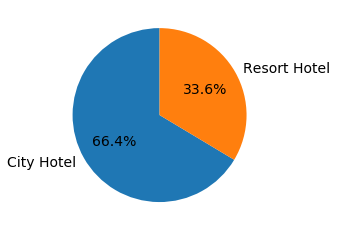

In [70]:

plt.pie(hotel_bookings['hotel'].value_counts().tolist(),
        labels=hotel_bookings['hotel'].value_counts().index.tolist(), autopct='%1.1f%%',
        startangle=90, textprops={'fontsize': 14})

In [71]:

hotel_bookings['hotel']=hotel_bookings['hotel'].astype('object')
hotel_bookings['is_canceled']=hotel_bookings['is_canceled'].astype('int64')

total_cancelations = hotel_bookings["is_canceled"].sum()
rh_cancelations = hotel_bookings.loc[hotel_bookings["hotel"] == "Resort Hotel"]["is_canceled"].sum()
ch_cancelations = hotel_bookings.loc[hotel_bookings["hotel"] == "City Hotel"]["is_canceled"].sum()

rel_cancel = total_cancelations / hotel_bookings.shape[0] * 100
rh_rel_cancel = rh_cancelations / hotel_bookings.loc[hotel_bookings["hotel"] == "Resort Hotel"].shape[0] * 100
ch_rel_cancel = ch_cancelations / hotel_bookings.loc[hotel_bookings["hotel"] == "City Hotel"].shape[0] * 100

print(f"Total bookings canceled: {total_cancelations:,} ({rel_cancel:.0f} %)")
print(f"Resort hotel bookings canceled: {rh_cancelations:,} ({rh_rel_cancel:.0f} %)")
print(f"City hotel bookings canceled: {ch_cancelations:,} ({ch_rel_cancel:.0f} %)")


Total bookings canceled: 44,199 (37 %)
Resort hotel bookings canceled: 11,120 (28 %)
City hotel bookings canceled: 33,079 (42 %)


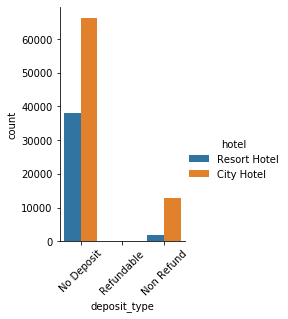

In [149]:

hotel_bookings['hotel']=hotel_bookings['hotel'].astype('object')
hotel_bookings['deposit_type']=hotel_bookings['deposit_type'].astype('object')


payment_analysis = sns.catplot(x="deposit_type", hue="hotel", 
                data=hotel_bookings, kind="count",
                height=4, aspect=.7)
payment_analysis.set_xticklabels(rotation=45)

In [ ]:

Special_request_plot = sns.catplot(x='total_of_special_requests', hue="hotel", col="is_canceled",
                data=hotel_bookings, kind="count",
                height=10, aspect=.8)

In [ ]:

plot6 = sns.catplot(x="required_car_parking_spaces", hue="hotel", col="is_canceled",
                data=hotel_bookings, kind="count",
                height=10, aspect=.8)

In [76]:

mySchema = StructType([ StructField("is_canceled", IntegerType(), True)\
                       ,StructField("hotel", StringType(), True)\
                       ,StructField("lead_time", ShortType(), True)\
                       ,StructField("arrival_date_year", ShortType(), True)\
                       ,StructField("arrival_date_month", StringType(), True)\
                       ,StructField("arrival_date_week_number", ByteType(), True)\
                       ,StructField("arrival_date_day_of_month", ByteType(), True)\
                       ,StructField("stays_in_weekend_nights", ByteType(), True)\
                       ,StructField("stays_in_week_nights", ByteType(), True)\
                       ,StructField("adults", ByteType(), True)\
                       ,StructField("children", ByteType(), True)\
                       ,StructField("babies", ByteType(), True)\
                       ,StructField("meal", StringType(), True)\
                       ,StructField("country", StringType(), True)\
                       ,StructField("market_segment", StringType(), True)\
                       ,StructField("distribution_channel", StringType(), True)\
                       ,StructField("is_repeated_guest", ByteType(), True)\
                       ,StructField("previous_cancellations", ByteType(), True)\
                       ,StructField("previous_bookings_not_canceled", ByteType(), True)\
                       ,StructField("reserved_room_type", StringType(), True)\
                       ,StructField("assigned_room_type", StringType(), True)\
                       ,StructField("booking_changes", ByteType(), True)\
                       ,StructField("deposit_type", StringType(), True)\
                       ,StructField("agent", StringType(), True)\
                       ,StructField("company", StringType(), True)\
                       ,StructField("days_in_waiting_list", ShortType(), True)\
                       ,StructField("customer_type", StringType(), True)\
                       ,StructField("adr", FloatType(), True)\
                       ,StructField("required_car_parking_spaces", ByteType(), True)\
                       ,StructField("total_of_special_requests", ByteType(), True)\
                       ,StructField("reservation_status", StringType(), True)\
                       ,StructField("reservation_status_date", DateType(), True)\
                       ,StructField("arrival_date_month_number", ByteType(), True)\
                       ,StructField("day_of_leaving", StringType(), True)\
                       ,StructField("total_night_stays", ByteType(), True)\
                       ,StructField("One_day_stay", StringType(), True)\
                       ])

columns = hotel_bookings[['is_canceled','hotel','lead_time','arrival_date_year','arrival_date_month',
                          'arrival_date_week_number','arrival_date_day_of_month','stays_in_weekend_nights',
                          'stays_in_week_nights','adults','children','babies','meal','country','market_segment',
                          'distribution_channel','is_repeated_guest','previous_cancellations',
                          'previous_bookings_not_canceled','reserved_room_type','assigned_room_type','booking_changes',
                          'deposit_type','agent','company','days_in_waiting_list','customer_type','adr',
                          'required_car_parking_spaces','total_of_special_requests','reservation_status',
                          'reservation_status_date','arrival_date_month_number','day_of_leaving','total_night_stays','One_day_stay']]

In [77]:

Hotel_Bookings=spark.createDataFrame(columns,mySchema)
Hotel_Bookings.printSchema()

root
 |-- is_canceled: integer (nullable = true)
 |-- hotel: string (nullable = true)
 |-- lead_time: short (nullable = true)
 |-- arrival_date_year: short (nullable = true)
 |-- arrival_date_month: string (nullable = true)
 |-- arrival_date_week_number: byte (nullable = true)
 |-- arrival_date_day_of_month: byte (nullable = true)
 |-- stays_in_weekend_nights: byte (nullable = true)
 |-- stays_in_week_nights: byte (nullable = true)
 |-- adults: byte (nullable = true)
 |-- children: byte (nullable = true)
 |-- babies: byte (nullable = true)
 |-- meal: string (nullable = true)
 |-- country: string (nullable = true)
 |-- market_segment: string (nullable = true)
 |-- distribution_channel: string (nullable = true)
 |-- is_repeated_guest: byte (nullable = true)
 |-- previous_cancellations: byte (nullable = true)
 |-- previous_bookings_not_canceled: byte (nullable = true)
 |-- reserved_room_type: string (nullable = true)
 |-- assigned_room_type: string (nullable = true)
 |-- booking_changes: 

In [78]:
cramers={}

In [79]:
indexer = StringIndexer(inputCol="adults", outputCol="adultsIndex")
assembler=VectorAssembler(inputCols=['adultsIndex'],outputCol='adultsVector')
pipeline = Pipeline(stages=[indexer,assembler])
Hotel_Bookings=pipeline.fit(Hotel_Bookings).transform(Hotel_Bookings)

In [80]:
r=ChiSquareTest.test(Hotel_Bookings,'adultsVector','is_canceled').head()
print("pValues: " + str(r.pValues))
print("degreesOfFreedom: " + str(r.degreesOfFreedom))
print("statistics: " + str(r.statistics))
cramers['adults']=float(np.sqrt(r.statistics/Hotel_Bookings.count()))


pValues: [0.0]
degreesOfFreedom: [13]
statistics: [884.9633855462503]


In [81]:
indexer = StringIndexer(inputCol="market_segment", outputCol="market_segmentIndex")
assembler=VectorAssembler(inputCols=['market_segmentIndex'],outputCol='market_segmentVector')
pipeline = Pipeline(stages=[indexer,assembler])
Hotel_Bookings=pipeline.fit(Hotel_Bookings).transform(Hotel_Bookings)


In [82]:
r=ChiSquareTest.test(Hotel_Bookings,'market_segmentVector','is_canceled').head()
print("pValues: " + str(r.pValues))
print("degreesOfFreedom: " + str(r.degreesOfFreedom))
print("statistics: " + str(r.statistics))
cramers['market_segment']=float(np.sqrt(r.statistics/Hotel_Bookings.count()))

pValues: [0.0]
degreesOfFreedom: [7]
statistics: [8498.74599699494]


In [83]:
indexer = StringIndexer(inputCol="arrival_date_month", outputCol="arrival_date_monthIndex")
assembler=VectorAssembler(inputCols=['arrival_date_monthIndex'],outputCol='arrival_date_monthVector')
pipeline = Pipeline(stages=[indexer,assembler])
Hotel_Bookings=pipeline.fit(Hotel_Bookings).transform(Hotel_Bookings)

In [84]:
r=ChiSquareTest.test(Hotel_Bookings,'arrival_date_monthVector','is_canceled').head()
print("pValues: " + str(r.pValues))
print("degreesOfFreedom: " + str(r.degreesOfFreedom))
print("statistics: " + str(r.statistics))
cramers['arrival_date_month']=float(np.sqrt(r.statistics/Hotel_Bookings.count()))

pValues: [0.0]
degreesOfFreedom: [11]
statistics: [582.2227667379334]


In [85]:
indexer = StringIndexer(inputCol="arrival_date_week_number", outputCol="arrival_date_week_numberIndex")
assembler=VectorAssembler(inputCols=['arrival_date_week_numberIndex'],outputCol='arrival_date_week_numberVector')
pipeline = Pipeline(stages=[indexer,assembler])
Hotel_Bookings=pipeline.fit(Hotel_Bookings).transform(Hotel_Bookings)

In [86]:
r=ChiSquareTest.test(Hotel_Bookings,'arrival_date_week_numberVector','is_canceled').head()
print("pValues: " + str(r.pValues))
print("degreesOfFreedom: " + str(r.degreesOfFreedom))
print("statistics: " + str(r.statistics))
cramers['arrival_date_week_number']=float(np.sqrt(r.statistics/Hotel_Bookings.count()))

pValues: [0.0]
degreesOfFreedom: [52]
statistics: [1123.357237638491]


In [87]:
indexer = StringIndexer(inputCol="stays_in_weekend_nights", outputCol="stays_in_weekend_nightsIndex")
assembler=VectorAssembler(inputCols=['stays_in_weekend_nightsIndex'],outputCol='stays_in_weekend_nightsVector')
pipeline = Pipeline(stages=[indexer,assembler])
Hotel_Bookings=pipeline.fit(Hotel_Bookings).transform(Hotel_Bookings)

In [88]:
r=ChiSquareTest.test(Hotel_Bookings,'stays_in_weekend_nightsVector','is_canceled').head()
print("pValues: " + str(r.pValues))
print("degreesOfFreedom: " + str(r.degreesOfFreedom))
print("statistics: " + str(r.statistics))
cramers['stays_in_weekend_nights']=float(np.sqrt(r.statistics/Hotel_Bookings.count()))

pValues: [1.1102230246251565e-16]
degreesOfFreedom: [16]
statistics: [112.55286008901929]


In [89]:
indexer = StringIndexer(inputCol="stays_in_week_nights", outputCol="stays_in_week_nightsIndex")
assembler=VectorAssembler(inputCols=['stays_in_week_nightsIndex'],outputCol='stays_in_week_nightsVector')
pipeline = Pipeline(stages=[indexer,assembler])
Hotel_Bookings=pipeline.fit(Hotel_Bookings).transform(Hotel_Bookings)

In [90]:
r=ChiSquareTest.test(Hotel_Bookings,'stays_in_week_nightsVector','is_canceled').head()
print("pValues: " + str(r.pValues))
print("degreesOfFreedom: " + str(r.degreesOfFreedom))
print("statistics: " + str(r.statistics))
cramers['stays_in_week_nights']=float(np.sqrt(r.statistics/Hotel_Bookings.count()))

pValues: [0.0]
degreesOfFreedom: [32]
statistics: [1691.0593222601146]


In [91]:
indexer = StringIndexer(inputCol="children", outputCol="childrenIndex")
assembler=VectorAssembler(inputCols=['childrenIndex'],outputCol='childrenVector')
pipeline = Pipeline(stages=[indexer,assembler])
Hotel_Bookings=pipeline.fit(Hotel_Bookings).transform(Hotel_Bookings)

In [92]:
r=ChiSquareTest.test(Hotel_Bookings,'childrenVector','is_canceled').head()
print("pValues: " + str(r.pValues))
print("degreesOfFreedom: " + str(r.degreesOfFreedom))
print("statistics: " + str(r.statistics))
cramers['children']=float(np.sqrt(r.statistics/Hotel_Bookings.count()))

pValues: [0.0]
degreesOfFreedom: [4]
statistics: [98.72358870301257]


In [93]:
indexer = StringIndexer(inputCol="babies", outputCol="babiesIndex")
assembler=VectorAssembler(inputCols=['babiesIndex'],outputCol='babiesVector')
pipeline = Pipeline(stages=[indexer,assembler])
Hotel_Bookings=pipeline.fit(Hotel_Bookings).transform(Hotel_Bookings)

In [94]:
r=ChiSquareTest.test(Hotel_Bookings,'babiesVector','is_canceled').head()
print("pValues: " + str(r.pValues))
print("degreesOfFreedom: " + str(r.degreesOfFreedom))
print("statistics: " + str(r.statistics))
cramers['babies']=float(np.sqrt(r.statistics/Hotel_Bookings.count()))

pValues: [0.0]
degreesOfFreedom: [4]
statistics: [141.41277777666724]


In [95]:
indexer = StringIndexer(inputCol="meal", outputCol="mealIndex")
assembler=VectorAssembler(inputCols=['mealIndex'],outputCol='mealVector')
pipeline = Pipeline(stages=[indexer,assembler])
Hotel_Bookings=pipeline.fit(Hotel_Bookings).transform(Hotel_Bookings)

In [96]:
r=ChiSquareTest.test(Hotel_Bookings,'mealVector','is_canceled').head()
print("pValues: " + str(r.pValues))
print("degreesOfFreedom: " + str(r.degreesOfFreedom))
print("statistics: " + str(r.statistics))
cramers['meal']=float(np.sqrt(r.statistics/Hotel_Bookings.count()))

pValues: [0.0]
degreesOfFreedom: [4]
statistics: [305.0232950685645]


In [97]:
indexer = StringIndexer(inputCol="country", outputCol="countryIndex")
assembler=VectorAssembler(inputCols=['countryIndex'],outputCol='countryVector')
pipeline = Pipeline(stages=[indexer,assembler])
Hotel_Bookings=pipeline.fit(Hotel_Bookings).transform(Hotel_Bookings)

In [98]:
r=ChiSquareTest.test(Hotel_Bookings,'countryVector','is_canceled').head()
print("pValues: " + str(r.pValues))
print("degreesOfFreedom: " + str(r.degreesOfFreedom))
print("statistics: " + str(r.statistics))
cramers['country']=float(np.sqrt(r.statistics/Hotel_Bookings.count()))

pValues: [0.0]
degreesOfFreedom: [177]
statistics: [15620.282198022387]


In [99]:
indexer = StringIndexer(inputCol="distribution_channel", outputCol="distribution_channelIndex")
assembler=VectorAssembler(inputCols=['distribution_channelIndex'],outputCol='distribution_channelVector')
pipeline = Pipeline(stages=[indexer,assembler])
Hotel_Bookings=pipeline.fit(Hotel_Bookings).transform(Hotel_Bookings)

In [100]:
r=ChiSquareTest.test(Hotel_Bookings,'distribution_channelVector','is_canceled').head()
print("pValues: " + str(r.pValues))
print("degreesOfFreedom: " + str(r.degreesOfFreedom))
print("statistics: " + str(r.statistics))
cramers['distribution_channel']=float(np.sqrt(r.statistics/Hotel_Bookings.count()))

pValues: [0.0]
degreesOfFreedom: [4]
statistics: [3741.79141091977]


In [101]:
indexer = StringIndexer(inputCol="is_repeated_guest", outputCol="is_repeated_guestIndex")
assembler=VectorAssembler(inputCols=['is_repeated_guestIndex'],outputCol='is_repeated_guestVector')
pipeline = Pipeline(stages=[indexer,assembler])
Hotel_Bookings=pipeline.fit(Hotel_Bookings).transform(Hotel_Bookings)

In [102]:
r=ChiSquareTest.test(Hotel_Bookings,'is_repeated_guestVector','is_canceled').head()
print("pValues: " + str(r.pValues))
print("degreesOfFreedom: " + str(r.degreesOfFreedom))
print("statistics: " + str(r.statistics))
cramers['is_repeated_guest']=float(np.sqrt(r.statistics/Hotel_Bookings.count()))


pValues: [0.0]
degreesOfFreedom: [1]
statistics: [836.0555307067813]


In [103]:
indexer = StringIndexer(inputCol="previous_cancellations", outputCol="previous_cancellationsIndex")
assembler=VectorAssembler(inputCols=['previous_cancellationsIndex'],outputCol='previous_cancellationsVector')
pipeline = Pipeline(stages=[indexer,assembler])
Hotel_Bookings=pipeline.fit(Hotel_Bookings).transform(Hotel_Bookings)

In [104]:
r=ChiSquareTest.test(Hotel_Bookings,'previous_cancellationsVector','is_canceled').head()
print("pValues: " + str(r.pValues))
print("degreesOfFreedom: " + str(r.degreesOfFreedom))
print("statistics: " + str(r.statistics))
cramers['previous_cancellation']=float(np.sqrt(r.statistics/Hotel_Bookings.count()))

pValues: [0.0]
degreesOfFreedom: [14]
statistics: [9260.342833187613]


In [105]:
indexer = StringIndexer(inputCol="reserved_room_type", outputCol="reserved_room_typeIndex")
assembler=VectorAssembler(inputCols=['reserved_room_typeIndex'],outputCol='reserved_room_typeVector')
pipeline = Pipeline(stages=[indexer,assembler])
Hotel_Bookings=pipeline.fit(Hotel_Bookings).transform(Hotel_Bookings)

In [106]:
r=ChiSquareTest.test(Hotel_Bookings,'reserved_room_typeVector','is_canceled').head()
print("pValues: " + str(r.pValues))
print("degreesOfFreedom: " + str(r.degreesOfFreedom))
print("statistics: " + str(r.statistics))
cramers['reserved_room_type']=float(np.sqrt(r.statistics/Hotel_Bookings.count()))

pValues: [0.0]
degreesOfFreedom: [8]
statistics: [631.2516158476984]


In [107]:
indexer = StringIndexer(inputCol="booking_changes", outputCol="booking_changesIndex")
assembler=VectorAssembler(inputCols=['booking_changesIndex'],outputCol='booking_changesVector')
pipeline = Pipeline(stages=[indexer,assembler])
Hotel_Bookings=pipeline.fit(Hotel_Bookings).transform(Hotel_Bookings)

In [108]:
r=ChiSquareTest.test(Hotel_Bookings,'booking_changesVector','is_canceled').head()
print("pValues: " + str(r.pValues))
print("degreesOfFreedom: " + str(r.degreesOfFreedom))
print("statistics: " + str(r.statistics))
cramers['booking_changes']=float(np.sqrt(r.statistics/Hotel_Bookings.count()))

pValues: [0.0]
degreesOfFreedom: [18]
statistics: [4186.2117768489115]


In [109]:
indexer = StringIndexer(inputCol="deposit_type", outputCol="deposit_typeIndex")
assembler=VectorAssembler(inputCols=['deposit_typeIndex'],outputCol='deposit_typeVector')
pipeline = Pipeline(stages=[indexer,assembler])
Hotel_Bookings=pipeline.fit(Hotel_Bookings).transform(Hotel_Bookings)

In [110]:
r=ChiSquareTest.test(Hotel_Bookings,'deposit_typeVector','is_canceled').head()
print("pValues: " + str(r.pValues))
print("degreesOfFreedom: " + str(r.degreesOfFreedom))
print("statistics: " + str(r.statistics))
cramers['deposit_type']=float(np.sqrt(r.statistics/Hotel_Bookings.count()))

pValues: [0.0]
degreesOfFreedom: [2]
statistics: [27641.39714597139]


In [111]:
indexer = StringIndexer(inputCol="agent", outputCol="agentIndex")
assembler=VectorAssembler(inputCols=['agentIndex'],outputCol='agentVector')
pipeline = Pipeline(stages=[indexer,assembler])
Hotel_Bookings=pipeline.fit(Hotel_Bookings).transform(Hotel_Bookings)

In [112]:
r=ChiSquareTest.test(Hotel_Bookings,'agentVector','is_canceled').head()
print("pValues: " + str(r.pValues))
print("degreesOfFreedom: " + str(r.degreesOfFreedom))
print("statistics: " + str(r.statistics))
cramers['agent']=float(np.sqrt(r.statistics/Hotel_Bookings.count()))

pValues: [0.0]
degreesOfFreedom: [333]
statistics: [17761.786291033997]


In [113]:
indexer = StringIndexer(inputCol="company", outputCol="companyIndex")
assembler=VectorAssembler(inputCols=['companyIndex'],outputCol='companyVector')
pipeline = Pipeline(stages=[indexer,assembler])
Hotel_Bookings=pipeline.fit(Hotel_Bookings).transform(Hotel_Bookings)

In [114]:
r=ChiSquareTest.test(Hotel_Bookings,'companyVector','is_canceled').head()
print("pValues: " + str(r.pValues))
print("degreesOfFreedom: " + str(r.degreesOfFreedom))
print("statistics: " + str(r.statistics))
cramers['company']=float(np.sqrt(r.statistics/Hotel_Bookings.count()))

pValues: [0.0]
degreesOfFreedom: [348]
statistics: [2361.2175952813077]


In [115]:
indexer = StringIndexer(inputCol="days_in_waiting_list", outputCol="days_in_waiting_listIndex")
assembler=VectorAssembler(inputCols=['days_in_waiting_listIndex'],outputCol='days_in_waiting_listVector')
pipeline = Pipeline(stages=[indexer,assembler])
Hotel_Bookings=pipeline.fit(Hotel_Bookings).transform(Hotel_Bookings)

In [116]:
r=ChiSquareTest.test(Hotel_Bookings,'days_in_waiting_listVector','is_canceled').head()
print("pValues: " + str(r.pValues))
print("degreesOfFreedom: " + str(r.degreesOfFreedom))
print("statistics: " + str(r.statistics))
cramers['days_in_waiting_list']=float(np.sqrt(r.statistics/Hotel_Bookings.count()))

pValues: [0.0]
degreesOfFreedom: [126]
statistics: [3173.5784683108445]


In [117]:
indexer = StringIndexer(inputCol="customer_type", outputCol="customer_typeIndex")
assembler=VectorAssembler(inputCols=['customer_typeIndex'],outputCol='customer_typeVector')
pipeline = Pipeline(stages=[indexer,assembler])
Hotel_Bookings=pipeline.fit(Hotel_Bookings).transform(Hotel_Bookings)

In [118]:
r=ChiSquareTest.test(Hotel_Bookings,'customer_typeVector','is_canceled').head()
print("pValues: " + str(r.pValues))
print("degreesOfFreedom: " + str(r.degreesOfFreedom))
print("statistics: " + str(r.statistics))
cramers['customer_type']=float(np.sqrt(r.statistics/Hotel_Bookings.count()))

pValues: [0.0]
degreesOfFreedom: [3]
statistics: [2224.970184990408]


In [119]:
indexer = StringIndexer(inputCol="required_car_parking_spaces", outputCol="required_car_parking_spacesIndex")
assembler=VectorAssembler(inputCols=['required_car_parking_spacesIndex'],outputCol='required_car_parking_spacesVector')
pipeline = Pipeline(stages=[indexer,assembler])
Hotel_Bookings=pipeline.fit(Hotel_Bookings).transform(Hotel_Bookings)

In [120]:
r=ChiSquareTest.test(Hotel_Bookings,'required_car_parking_spacesVector','is_canceled').head()
print("pValues: " + str(r.pValues))
print("degreesOfFreedom: " + str(r.degreesOfFreedom))
print("statistics: " + str(r.statistics))
cramers['required_car_parking_spaces']=float(np.sqrt(r.statistics/Hotel_Bookings.count()))

pValues: [0.0]
degreesOfFreedom: [4]
statistics: [4654.939951610829]


In [121]:
indexer = StringIndexer(inputCol="total_of_special_requests", outputCol="total_of_special_requestsIndex")
assembler=VectorAssembler(inputCols=['total_of_special_requestsIndex'],outputCol='total_of_special_requestsVector')
pipeline = Pipeline(stages=[indexer,assembler])
Hotel_Bookings=pipeline.fit(Hotel_Bookings).transform(Hotel_Bookings)

In [122]:
r=ChiSquareTest.test(Hotel_Bookings,'total_of_special_requestsVector','is_canceled').head()
print("pValues: " + str(r.pValues))
print("degreesOfFreedom: " + str(r.degreesOfFreedom))
print("statistics: " + str(r.statistics))
cramers['total_of_special_requests']=float(np.sqrt(r.statistics/Hotel_Bookings.count()))

pValues: [0.0]
degreesOfFreedom: [5]
statistics: [8408.589662195596]


In [123]:
indexer = StringIndexer(inputCol="total_night_stays", outputCol="total_night_staysIndex")
assembler=VectorAssembler(inputCols=['total_night_staysIndex'],outputCol='total_night_staysVector')
pipeline = Pipeline(stages=[indexer,assembler])
Hotel_Bookings=pipeline.fit(Hotel_Bookings).transform(Hotel_Bookings)

In [124]:
r=ChiSquareTest.test(Hotel_Bookings,'total_night_staysVector','is_canceled').head()
print("pValues: " + str(r.pValues))
print("degreesOfFreedom: " + str(r.degreesOfFreedom))
print("statistics: " + str(r.statistics))
cramers['total_night_stays']=float(np.sqrt(r.statistics/Hotel_Bookings.count()))

pValues: [0.0]
degreesOfFreedom: [41]
statistics: [2726.8472957246236]


In [125]:
cramers={k: v for k, v in sorted(cramers.items(), key=lambda item: item[1],reverse=True)}

In [127]:
Hotel_Bookings=spark.createDataFrame(columns,mySchema)

In [128]:
categoricalColumns = ["deposit_type","agent","country","previous_cancellations" ,"market_segment", "total_of_special_requests"]

stages = []
for categoricalCol in categoricalColumns:
    stringIndexer = StringIndexer(inputCol=categoricalCol, outputCol=categoricalCol + "Index")
    encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()], 
                            outputCols=[categoricalCol + "classEncoder"])
    stages += [stringIndexer, encoder]

label_stringIndx = StringIndexer(inputCol="is_canceled", outputCol="label")
stages += [label_stringIndx]



In [129]:
from pyspark.ml.feature import VectorAssembler
Vector_Assembler=VectorAssembler(inputCols=['deposit_typeclassEncoder','agentclassEncoder',
                                           'countryclassEncoder','previous_cancellationsclassEncoder',
                                           'market_segmentclassEncoder','total_of_special_requestsclassEncoder'],
                                outputCol='features')
stages+=[Vector_Assembler]


In [130]:
partial_Pipeline = Pipeline().setStages(stages)
pipeline_Model = partial_Pipeline.fit(Hotel_Bookings)
prepped_DF = pipeline_Model.transform(Hotel_Bookings)

In [131]:

zeros = prepped_DF.filter(prepped_DF["is_canceled"]==0)
ones = prepped_DF.filter(prepped_DF["is_canceled"]==1)
train0, test0 = zeros.randomSplit([0.8,0.2], seed=1234)
train1, test1 = ones.randomSplit([0.8,0.2], seed=1234)
train = train0.union(train1)
test = test0.union(test1)

**MODEL 1: GBT Classifier**

In [132]:
gbClassifier = GBTClassifier()
trainedModel_gbt = gbClassifier.fit(train)

In [133]:
predictions_gbt = trainedModel_gbt.transform(test)
predictions_gbt

DataFrame[is_canceled: int, hotel: string, lead_time: smallint, arrival_date_year: smallint, arrival_date_month: string, arrival_date_week_number: tinyint, arrival_date_day_of_month: tinyint, stays_in_weekend_nights: tinyint, stays_in_week_nights: tinyint, adults: tinyint, children: tinyint, babies: tinyint, meal: string, country: string, market_segment: string, distribution_channel: string, is_repeated_guest: tinyint, previous_cancellations: tinyint, previous_bookings_not_canceled: tinyint, reserved_room_type: string, assigned_room_type: string, booking_changes: tinyint, deposit_type: string, agent: string, company: string, days_in_waiting_list: smallint, customer_type: string, adr: float, required_car_parking_spaces: tinyint, total_of_special_requests: tinyint, reservation_status: string, reservation_status_date: date, arrival_date_month_number: tinyint, day_of_leaving: string, total_night_stays: tinyint, One_day_stay: string, deposit_typeIndex: double, deposit_typeclassEncoder: vect

In [134]:
evaluator = BinaryClassificationEvaluator(labelCol='is_canceled')

auroc = evaluator.evaluate(predictions_gbt, {evaluator.metricName: "areaUnderROC"})
auprc = evaluator.evaluate(predictions_gbt, {evaluator.metricName: "areaUnderPR"})
print("Area under ROC Curve: {:.4f}".format(auroc))
print("Area under PR Curve: {:.4f}".format(auprc))

Area under ROC Curve: 0.8837
Area under PR Curve: 0.8428


In [ ]:
results = predictions_gbt.select(['prediction', 'label'])
predictionAndLabels=results.rdd
metrics = MulticlassMetrics(predictionAndLabels)


cm=metrics.confusionMatrix().toArray()
accuracy=(cm[0][0]+cm[1][1])/cm.sum()
precision=(cm[0][0])/(cm[0][0]+cm[1][0])
recall=(cm[0][0])/(cm[0][0]+cm[0][1])

print("GBT Classifier -")
print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))

In [136]:

dtclassifier=DecisionTreeClassifier()
trainModel_dt = dtclassifier.fit(train)

In [137]:

predictions_dt = trainModel_dt.transform(test)
predictions_dt

DataFrame[is_canceled: int, hotel: string, lead_time: smallint, arrival_date_year: smallint, arrival_date_month: string, arrival_date_week_number: tinyint, arrival_date_day_of_month: tinyint, stays_in_weekend_nights: tinyint, stays_in_week_nights: tinyint, adults: tinyint, children: tinyint, babies: tinyint, meal: string, country: string, market_segment: string, distribution_channel: string, is_repeated_guest: tinyint, previous_cancellations: tinyint, previous_bookings_not_canceled: tinyint, reserved_room_type: string, assigned_room_type: string, booking_changes: tinyint, deposit_type: string, agent: string, company: string, days_in_waiting_list: smallint, customer_type: string, adr: float, required_car_parking_spaces: tinyint, total_of_special_requests: tinyint, reservation_status: string, reservation_status_date: date, arrival_date_month_number: tinyint, day_of_leaving: string, total_night_stays: tinyint, One_day_stay: string, deposit_typeIndex: double, deposit_typeclassEncoder: vect

In [138]:
evaluator = BinaryClassificationEvaluator(labelCol='is_canceled')

auroc = evaluator.evaluate(predictions_dt, {evaluator.metricName: "areaUnderROC"})
auprc = evaluator.evaluate(predictions_dt, {evaluator.metricName: "areaUnderPR"})
print("Area under ROC Curve: {:.4f}".format(auroc))
print("Area under PR Curve: {:.4f}".format(auprc))

Area under ROC Curve: 0.7225
Area under PR Curve: 0.6967


In [139]:
results1 = predictions_dt.select(['prediction', 'label'])
predictionAndLabels1=results1.rdd
metrics = MulticlassMetrics(predictionAndLabels1)


cm=metrics.confusionMatrix().toArray()
accuracy=(cm[0][0]+cm[1][1])/cm.sum()
precision=(cm[0][0])/(cm[0][0]+cm[1][0])
recall=(cm[0][0])/(cm[0][0]+cm[0][1])

print("Decision Tree Classifier -")
print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))


Decision Tree Classifier -
Accuracy: 0.7912
Precision: 0.7768
Recall: 0.9383


In [140]:
rfclassifier=RandomForestClassifier()
trainedModel_rf = rfclassifier.fit(train)


In [141]:
predictions_rf= trainedModel_rf.transform(test)
predictions_rf

DataFrame[is_canceled: int, hotel: string, lead_time: smallint, arrival_date_year: smallint, arrival_date_month: string, arrival_date_week_number: tinyint, arrival_date_day_of_month: tinyint, stays_in_weekend_nights: tinyint, stays_in_week_nights: tinyint, adults: tinyint, children: tinyint, babies: tinyint, meal: string, country: string, market_segment: string, distribution_channel: string, is_repeated_guest: tinyint, previous_cancellations: tinyint, previous_bookings_not_canceled: tinyint, reserved_room_type: string, assigned_room_type: string, booking_changes: tinyint, deposit_type: string, agent: string, company: string, days_in_waiting_list: smallint, customer_type: string, adr: float, required_car_parking_spaces: tinyint, total_of_special_requests: tinyint, reservation_status: string, reservation_status_date: date, arrival_date_month_number: tinyint, day_of_leaving: string, total_night_stays: tinyint, One_day_stay: string, deposit_typeIndex: double, deposit_typeclassEncoder: vect

In [142]:
evaluator = BinaryClassificationEvaluator(labelCol='is_canceled')

auroc = evaluator.evaluate(predictions_rf, {evaluator.metricName: "areaUnderROC"})
auprc = evaluator.evaluate(predictions_rf, {evaluator.metricName: "areaUnderPR"})
print("Area under ROC Curve: {:.4f}".format(auroc))
print("Area under PR Curve: {:.4f}".format(auprc))

Area under ROC Curve: 0.7795
Area under PR Curve: 0.7515


In [143]:
results2 = predictions_rf.select(['prediction', 'label'])
predictionAndLabels2=results2.rdd
metrics = MulticlassMetrics(predictionAndLabels2)



cm=metrics.confusionMatrix().toArray()
accuracy=(cm[0][0]+cm[1][1])/cm.sum()
precision=(cm[0][0])/(cm[0][0]+cm[1][0])
recall=(cm[0][0])/(cm[0][0]+cm[0][1])
print("Random Forest Classifier -")
print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))

Random Forest Classifier -
Accuracy: 0.7655
Precision: 0.7299
Recall: 0.9967


In [144]:
data = [[1, 'GBT', 0.8036, 0.7982, 0.9213, 0.8837, 0.8428], [2, 'Decision Tree',0.7912, 0.7768, 0.9383, 0.7225, 0.6967],[3, 'Random Forest', 0.7637, 0.7285, 0.9963, 0.8112, 0.7697]]
Model_Comparison = pd.DataFrame(data, columns = ['S.No.', 'ModelName', 'Accuracy', 'Precision', 'Recall', 'ROC Curve', 'PR curve']) 